In [70]:
import pandas as pd
df_Airports = pd.read_csv('dataset/Airports.csv', index_col=0)
df_Flights = pd.read_csv('dataset/Flights.csv')

In [94]:
print("%d rows x %d columns" % (df_Airports.shape))
df_Airports.head()

365 rows x 3 columns


,city,state,name
airport_id,,,
10165,Adak Island,AK,Adak
10299,Anchorage,AK,Ted Stevens Anchorage International
10304,Aniak,AK,Aniak Airport
10754,Barrow,AK,Wiley Post/Will Rogers Memorial
10551,Bethel,AK,Bethel Airport


In [95]:
print("%d rows x %d columns" % (df_Flights.shape))
df_Flights.head()

2702218 rows x 7 columns


,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11


In [72]:
# df_Flights['OriginAirport'] = df_Flights['OriginAirportID'].map(df_Airports['name'])
# df_Flights['DestinationAirport'] = df_Flights['DestAirportID'].map(df_Airports['name'])
# df_Flights

In [ ]:
# df_AirportOrgFlights = df_Airports.set_index('airport_id')
#                                   .join(df_Flights.set_index('OriginAirportID'))

# df_AirportFlights = df_Airports.set_index('airport_id')
#                                .join(df_AirportOrgFlights.set_index('DestAirportID'), 
#                                      lsuffix='_org', 
#                                      rsuffix='_dest')

# df_AirportFlights.head()

In [96]:
df_FlightsNew = df_Flights\
                    .merge(df_Airports, 
                           left_on='OriginAirportID', 
                           right_index=True)\
                    .merge(df_Airports, 
                           left_on='DestAirportID', 
                           right_index=True, 
                           suffixes=('_origin','_destination'))

In [97]:
# columns = list(df_FlightsNew.columns.values)
# columns.remove('Carrier')

# df_FlightsNew[columns]

# df_FlightsNew.drop(['Carrier'], axis=1)

# df_FlightsNew[['Carrier','city_origin','destination_origin']].head()

In [99]:
print("%d rows x %d columns" % (df_FlightsNew.shape))
df_FlightsNew.head()

2702218 rows x 13 columns


,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay,city_origin,state_origin,name_origin,city_destination,state_destination,name_destination
0,19,5,DL,11433,13303,-3,1,Detroit,MI,Detroit Metro Wayne County,Miami,FL,Miami International
110,18,4,DL,11433,13303,103,90,Detroit,MI,Detroit Metro Wayne County,Miami,FL,Miami International
1090,19,5,DL,11433,13303,2,13,Detroit,MI,Detroit Metro Wayne County,Miami,FL,Miami International
2130,17,3,DL,11433,13303,221,204,Detroit,MI,Detroit Metro Wayne County,Miami,FL,Miami International
3508,20,6,DL,11433,13303,-2,16,Detroit,MI,Detroit Metro Wayne County,Miami,FL,Miami International


In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

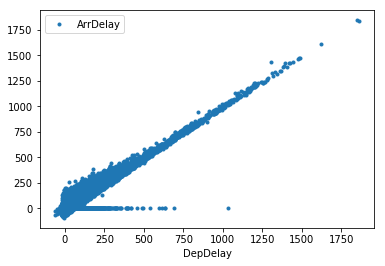

In [106]:
df_Flights.plot(x='DepDelay', y='ArrDelay', style='.')